1.1

In [27]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [28]:
# Load the penguins dataset
df = sns.load_dataset("penguins")
df.dropna(inplace = True)

# Filter rows for 'Adelie ' and 'Chinstrap ' classes
selected_classes = ['Adelie', 'Chinstrap']
df_filtered = df[df['species'].isin(selected_classes)].copy () # Make a copy to avoid the warning

# Initialize the LabelEncoder
le = LabelEncoder()

# Encode the species column
y_encoded = le.fit_transform(df_filtered ['species'])
df_filtered['class_encoded'] = y_encoded

# Display the filtered and encoded DataFrame
print(df_filtered[['species', 'class_encoded']])

# Split the data into features (X) and target variable (y)
y = df_filtered['class_encoded'] # Target variable
X = df_filtered.drop([ 'species', 'island', 'sex','class_encoded'] , axis = 1)

       species  class_encoded
0       Adelie              0
1       Adelie              0
2       Adelie              0
4       Adelie              0
5       Adelie              0
..         ...            ...
215  Chinstrap              1
216  Chinstrap              1
217  Chinstrap              1
218  Chinstrap              1
219  Chinstrap              1

[214 rows x 2 columns]


1.5

In [29]:
X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size =0.2 , random_state =42)

#Train the logistic regression model . Here we are using saga solver to learn weights .
logreg = LogisticRegression(solver ='saga')
logreg.fit( X_train , y_train )

# Predict on the testing data
y_pred = logreg.predict( X_test )

# Evaluate the model
accuracy = accuracy_score( y_test , y_pred )
print ("Accuracy :", accuracy )
print ( logreg.coef_ , logreg.intercept_ )


Accuracy : 0.5813953488372093
[[ 2.76194558e-03 -8.34380763e-05  4.63329654e-04 -2.86675003e-04]] [-8.44447624e-06]


c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


1.8

In [30]:
X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size =0.2 , random_state =42)

#Train the logistic regression model . Here we are using saga solver to learn weights .
logreg = LogisticRegression(solver ='liblinear')
logreg.fit( X_train , y_train )

# Predict on the testing data
y_pred = logreg.predict( X_test )

# Evaluate the model
accuracy = accuracy_score( y_test , y_pred )
print ("Accuracy :", accuracy )
print ( logreg.coef_ , logreg.intercept_ )


Accuracy : 1.0
[[ 1.67821215 -1.40016667 -0.16592212 -0.00432862]] [-0.07906013]


1.10

In [31]:
from sklearn.preprocessing import StandardScaler

X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size =0.2 , random_state =42)

scaler = StandardScaler()

# Scale the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Saga solver with scaling
logreg_saga_scaled = LogisticRegression(solver='saga')

logreg_saga_scaled.fit(X_train_scaled, y_train)
y_pred_saga_scaled = logreg_saga_scaled.predict(X_test_scaled)
accuracy_saga_scaled = accuracy_score(y_test, y_pred_saga_scaled)

print ("Accuracy saga scaled", accuracy_saga_scaled)
print ( logreg_saga_scaled.coef_ , logreg_saga_scaled.intercept_ )

Accuracy saga scaled 0.9767441860465116
[[ 3.9044008  -0.82351745  0.18542385 -0.73555605]] [-1.96728806]


In [32]:
X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size =0.2 , random_state =42)

scaler = StandardScaler()

# Scale the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


logreg_liblinear_scaled = LogisticRegression(solver='liblinear')

logreg_liblinear_scaled.fit(X_train_scaled, y_train)
y_pred_liblinear_scaled = logreg_liblinear_scaled.predict(X_test_scaled)
accuracy_liblinear_scaled = accuracy_score(y_test, y_pred_liblinear_scaled)

print ("Accuracy liblinear scaled", accuracy_liblinear_scaled)
print ( logreg_liblinear_scaled.coef_ , logreg_liblinear_scaled.intercept_ )

Accuracy liblinear scaled 0.9767441860465116
[[ 3.77819685 -0.75341497  0.17248526 -0.71597049]] [-1.72205563]


2.1

In [33]:
#Heart disease dataset

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

2.2

               age  trestbps      chol   thalach   oldpeak       num
age       1.000000  0.284946  0.208950 -0.393806  0.203805  0.222853
trestbps  0.284946  1.000000  0.130120 -0.045351  0.189171  0.157754
chol      0.208950  0.130120  1.000000 -0.003432  0.046564  0.070909
thalach  -0.393806 -0.045351 -0.003432  1.000000 -0.343085 -0.415040
oldpeak   0.203805  0.189171  0.046564 -0.343085  1.000000  0.504092
num       0.222853  0.157754  0.070909 -0.415040  0.504092  1.000000


c:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

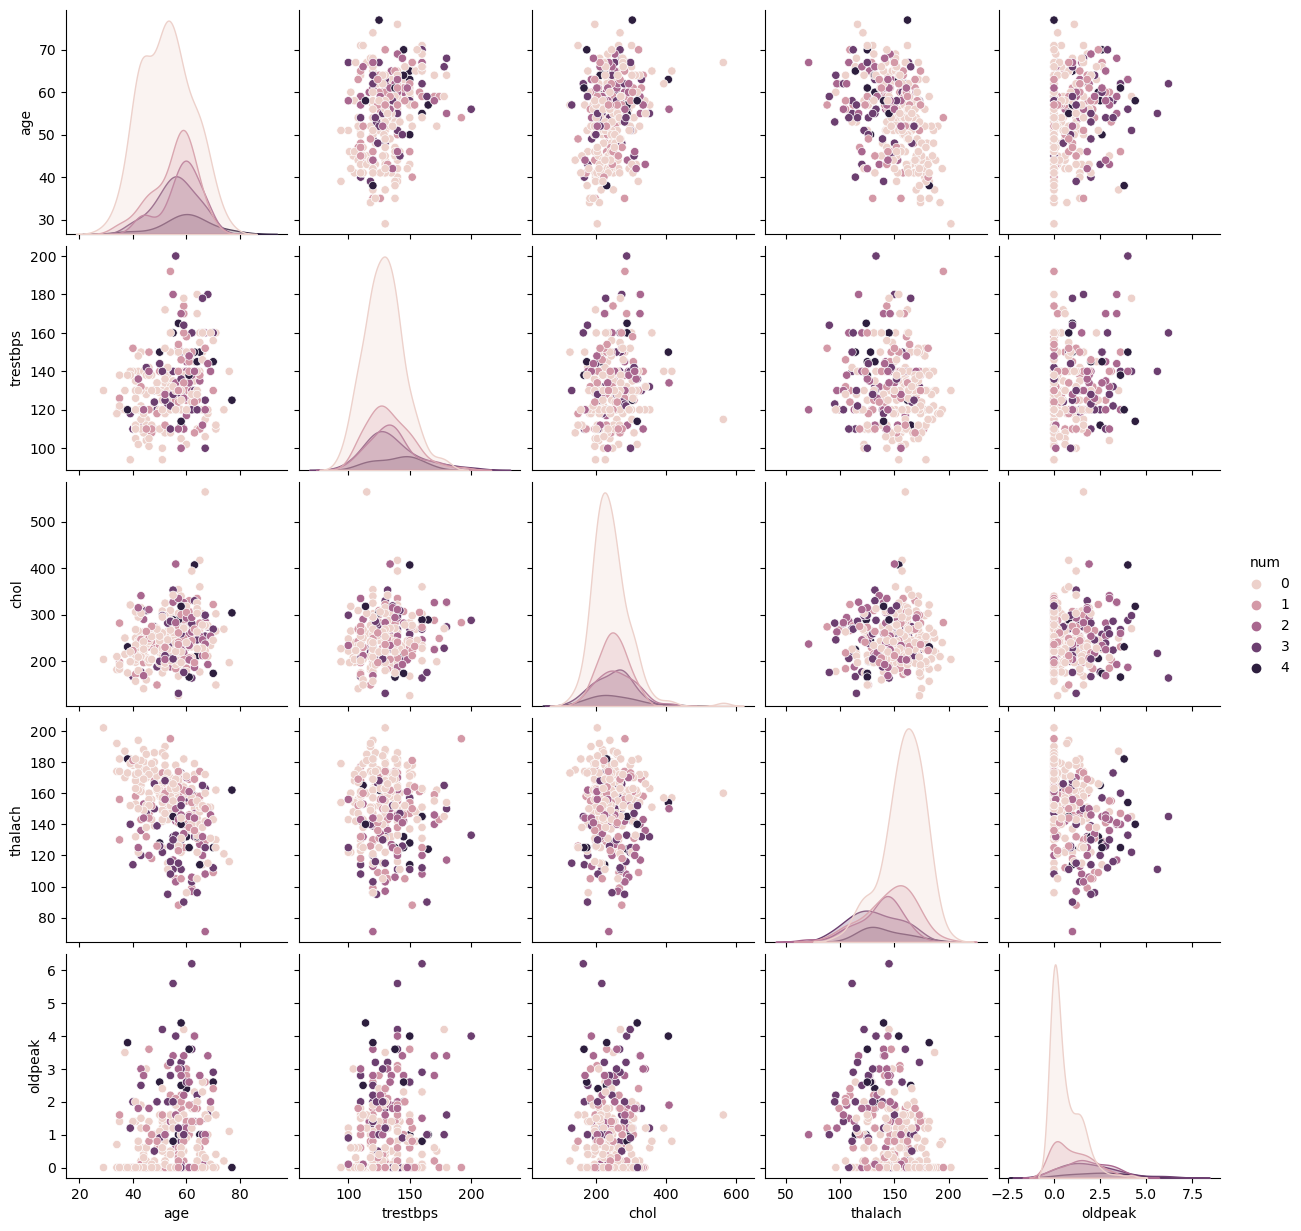

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

selected_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
X_selected = X[selected_features]
df = pd.concat([X_selected, y], axis=1)
df.dropna()

corr_matrix = df.corr()
print(corr_matrix)

sns.pairplot(data=df, diag_kind='kde', hue='num')
plt.show()

2.3

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = df[selected_features].copy()
X_scaled = scaler.fit_transform(X)

y = df[['num']]

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(multi_class='multinomial', solver='saga')

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.4918032786885246

Confusion Matrix:
 [[28  0  1  0  0]
 [ 9  0  1  2  0]
 [ 4  0  1  4  0]
 [ 4  0  2  1  0]
 [ 2  0  1  1  0]]
Precision: 0.32215730728985004
Recall: 0.4918032786885246
F1-Score: 0.38527466206499855


c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2.4


In [36]:
import statsmodels.api as sm

X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mnlogit_model = sm.MNLogit(y_train, X_train)
result = mnlogit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 1.046299
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:                    num   No. Observations:                  242
Model:                        MNLogit   Df Residuals:                      218
Method:                           MLE   Df Model:                           20
Date:                Wed, 02 Oct 2024   Pseudo R-squ.:                  0.1624
Time:                        22:33:10   Log-Likelihood:                -253.20
converged:                       True   LL-Null:                       -302.31
Covariance Type:            nonrobust   LLR p-value:                 2.618e-12
     num=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9045      2.383     -0.799      0.424      -6.575       2.766
age            0.0166      0.

3.1

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

# Generate synthetic data
np.random.seed(0)
centers = [[ -5 , 0] , [5 , 1.5]]
X , y = make_blobs( n_samples =2000 , centers = centers , random_state = 5)
transformation = [[0.5 , 0.5] , [ -0.5 , 1.5]]
X = np.dot(X , transformation)

3.2

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(X, weights):
    return sigmoid(np.dot(X, weights))

def compute_loss(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def gradient(X, weights, y):
    sum = 0
    for i in range(X.shape[0]):
        sum += (sigmoid(np.dot(X[i], weights))-y[i])*X[i]
    return sum/X.shape[0]

def batch_gradient_descent(X, y, learning_rate=0.01, n_iterations=20):

    #add bias to X
    X = np.hstack([np.ones((X.shape[0], 1)), X])
    
    # Initialize weights randomly
    np.random.seed(42)
    weights = np.random.randn(X.shape[1])  
    
    # Initialize a list to store the loss at each iteration
    losses = []

    # Perform the iterations
    for i in range(n_iterations):
        y_pred = predict(X, weights)

        # Compute the loss
        loss = compute_loss(y, y_pred)
        losses.append(loss)
        grad = gradient(X, weights, y)

        weights -= learning_rate * grad

        print(f"Iteration {i+1}/{n_iterations}, Loss: {loss:.4f}")

    return weights, losses

In [39]:
weights_bg, losses_bg = batch_gradient_descent(X, y)

Iteration 1/20, Loss: 0.2772
Iteration 2/20, Loss: 0.2729
Iteration 3/20, Loss: 0.2686
Iteration 4/20, Loss: 0.2645
Iteration 5/20, Loss: 0.2605
Iteration 6/20, Loss: 0.2566
Iteration 7/20, Loss: 0.2528
Iteration 8/20, Loss: 0.2492
Iteration 9/20, Loss: 0.2456
Iteration 10/20, Loss: 0.2421
Iteration 11/20, Loss: 0.2387
Iteration 12/20, Loss: 0.2353
Iteration 13/20, Loss: 0.2321
Iteration 14/20, Loss: 0.2290
Iteration 15/20, Loss: 0.2259
Iteration 16/20, Loss: 0.2229
Iteration 17/20, Loss: 0.2200
Iteration 18/20, Loss: 0.2171
Iteration 19/20, Loss: 0.2143
Iteration 20/20, Loss: 0.2116


3.4

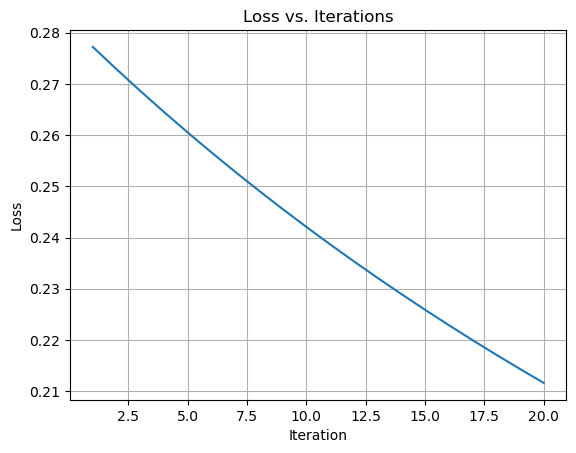

In [40]:
plt.plot(range(1, 21), losses_bg)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations')
plt.grid(True)
plt.show()

3.5

In [41]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(X, weights):
    return sigmoid(np.dot(X, weights))

def compute_loss(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def gradient_sg(xi, weights, yi):
    return (sigmoid(np.dot(xi, weights)) - yi) * xi

def stochastic_gradient_descent(X, y, learning_rate=0.01, iterations=20):

    X = np.hstack([np.ones((X.shape[0], 1)), X])

    np.random.seed(42)
    weights = np.random.randn(X.shape[1])  
    
    losses = []  

    # Perform the iterations (epochs)
    for i in range(iterations):
        # Shuffle the data at the start of each epoch to prevent cycles
        indices = np.random.permutation(X.shape[0])
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        
        # Perform stochastic gradient descent
        xi = X_shuffled[1]
        yi = y_shuffled[1]
            
        grad = gradient_sg(xi, weights, yi)
        
        weights -= learning_rate * grad
        
        y_pred = predict(X, weights)
        loss = compute_loss(y, y_pred)
        losses.append(loss)
        
        print(f"Iteration {iterations+1}/{iterations}, Loss: {loss:.4f}")
    
    return weights, losses

In [42]:
weights_sg, losses_sg = stochastic_gradient_descent(X, y)

Iteration 21/20, Loss: 0.2707
Iteration 21/20, Loss: 0.2690
Iteration 21/20, Loss: 0.2680
Iteration 21/20, Loss: 0.2675
Iteration 21/20, Loss: 0.2671
Iteration 21/20, Loss: 0.2647
Iteration 21/20, Loss: 0.2596
Iteration 21/20, Loss: 0.2527
Iteration 21/20, Loss: 0.2522
Iteration 21/20, Loss: 0.2491
Iteration 21/20, Loss: 0.2488
Iteration 21/20, Loss: 0.2445
Iteration 21/20, Loss: 0.2434
Iteration 21/20, Loss: 0.2411
Iteration 21/20, Loss: 0.2350
Iteration 21/20, Loss: 0.2307
Iteration 21/20, Loss: 0.2299
Iteration 21/20, Loss: 0.2271
Iteration 21/20, Loss: 0.2258
Iteration 21/20, Loss: 0.2253


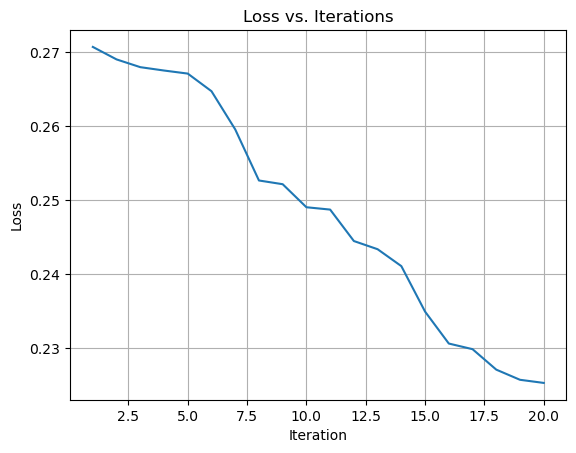

In [43]:
plt.plot(range(1, 21), losses_sg)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations')
plt.grid(True)
plt.show()

3.6

In [44]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(X, weights):
    return sigmoid(np.dot(X, weights))

def compute_loss(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def newton(X, y, n_iterations=20, tol=1e-5):
    # Add a bias (intercept) column to X
    X = np.hstack([np.ones((X.shape[0], 1)), X])

    N, d = X.shape  # N: number of samples, d: number of features
    w = np.zeros(d)  # Initialize weights as zeros
    
    losses = []
    for iteration in range(n_iterations):
        s_list = []
        z_list = []

        # Iterate through each sample
        for i in range(N):
            a = np.dot(w.T, X[i])
            mu = sigmoid(a)  
            s = mu * (1 - mu) 
            
            # Safeguard against division by zero in 's'
            if s < tol:
                s = tol 
            z = a + (y[i] - mu) / s

            s_list.append(s)
            z_list.append(z)

        S = np.diag(s_list)
        z = np.array(z_list)

        # Newton's method weight update: w = (X^T * S * X)^(-1) * X^T * S * z
        try:
            S_inv_X = np.linalg.inv(X.T @ S @ X)
        except np.linalg.LinAlgError:
            print("Singular matrix encountered, stopping early.")
            break
        
        w = S_inv_X @ X.T @ S @ z

        y_pred = predict(X, w)
        loss = compute_loss(y, y_pred)
        losses.append(loss)

        print(f"Iteration {iteration+1}/{n_iterations}, Loss: {loss:.4f}, Weights: {w}")
    
    return w, losses

In [45]:
weight_nw, losses_nw = newton(X, y, n_iterations=20)

Iteration 1/20, Loss: 0.1452, Weights: [-0.03981141  0.53868061  0.21434947]
Iteration 2/20, Loss: 0.0528, Weights: [-0.05813822  0.86912155  0.34584955]
Iteration 3/20, Loss: 0.0203, Weights: [-0.07164534  1.18937095  0.47299785]
Iteration 4/20, Loss: 0.0080, Weights: [-0.08272078  1.51681649  0.6022525 ]
Iteration 5/20, Loss: 0.0032, Weights: [-0.09419423  1.8586337   0.73584965]
Iteration 6/20, Loss: 0.0013, Weights: [-0.11060199  2.21993607  0.87500272]
Iteration 7/20, Loss: 0.0005, Weights: [-0.13887418  2.60581481  1.02087009]
Iteration 8/20, Loss: 0.0002, Weights: [-0.188311    3.02014032  1.17467288]
Iteration 9/20, Loss: 0.0001, Weights: [-0.26665127  3.45391863  1.33452498]
Iteration 10/20, Loss: 0.0000, Weights: [-0.36903715  3.86190917  1.48694895]
Iteration 11/20, Loss: 0.0000, Weights: [-0.46958246  4.18071342  1.61143165]
Iteration 12/20, Loss: 0.0000, Weights: [-0.54957409  4.41275214  1.70422834]
Iteration 13/20, Loss: 0.0000, Weights: [-0.61126862  4.58792031  1.77428

3.7

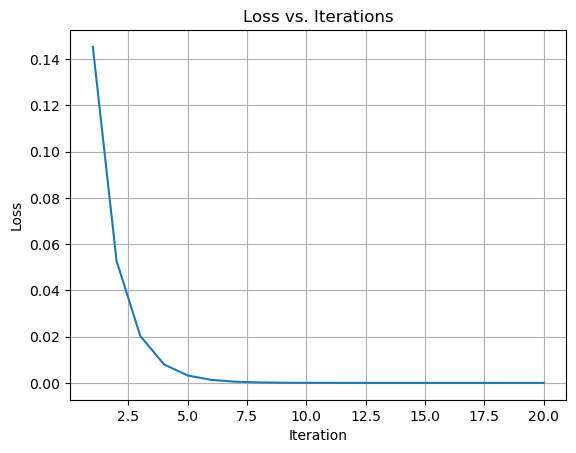

In [46]:
plt.plot(range(1, 21), losses_nw)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations')
plt.grid(True)
plt.show()

3.8

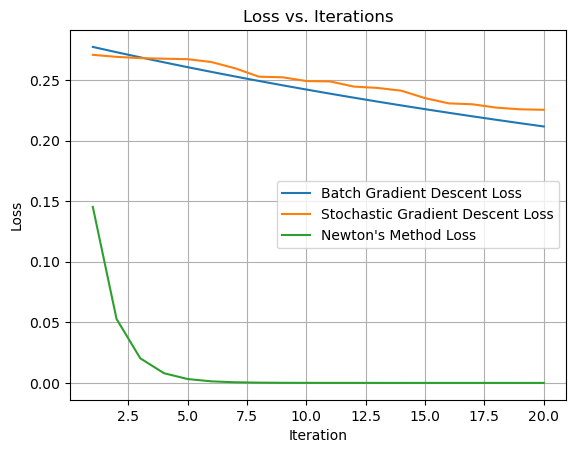

In [47]:
plt.plot(range(1, 21), losses_bg, label='Batch Gradient Descent Loss')
plt.plot(range(1, 21), losses_sg, label='Stochastic Gradient Descent Loss')
plt.plot(range(1, 21), losses_nw, label='Newton\'s Method Loss')

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations')
plt.legend()
plt.grid(True)
plt.show()



3.10

In [48]:
np.random.seed(0)
centers_updated = [[ 3 , 0] , [5 , 1.5]]
X_updated , y_updated = make_blobs( n_samples =2000 , centers = centers_updated , random_state = 5)
transformation = [[0.5 , 0.5] , [ -0.5 , 1.5]]
X_updated = np.dot(X_updated , transformation)

In [49]:
weights_bg_updated, losses_bg_updated = batch_gradient_descent(X_updated, y_updated)

Iteration 1/20, Loss: 0.8376
Iteration 2/20, Loss: 0.8305
Iteration 3/20, Loss: 0.8236
Iteration 4/20, Loss: 0.8168
Iteration 5/20, Loss: 0.8101
Iteration 6/20, Loss: 0.8036
Iteration 7/20, Loss: 0.7971
Iteration 8/20, Loss: 0.7907
Iteration 9/20, Loss: 0.7845
Iteration 10/20, Loss: 0.7784
Iteration 11/20, Loss: 0.7724
Iteration 12/20, Loss: 0.7665
Iteration 13/20, Loss: 0.7607
Iteration 14/20, Loss: 0.7551
Iteration 15/20, Loss: 0.7496
Iteration 16/20, Loss: 0.7441
Iteration 17/20, Loss: 0.7388
Iteration 18/20, Loss: 0.7336
Iteration 19/20, Loss: 0.7286
Iteration 20/20, Loss: 0.7236


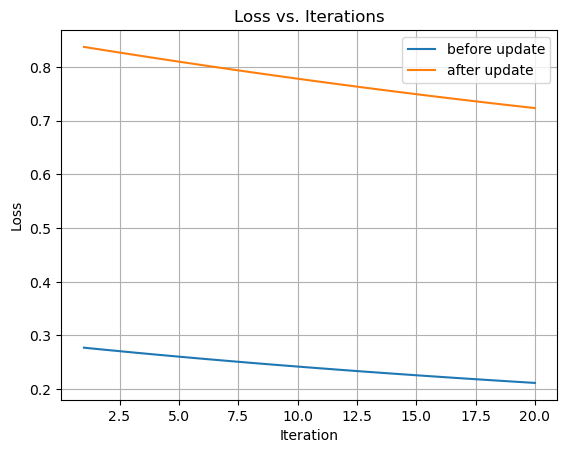

In [50]:
plt.plot(range(1, 21), losses_bg, label = 'before update')
plt.plot(range(1, 21), losses_bg_updated, label = 'after update')

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations')
plt.grid(True)
plt.legend()
plt.show()

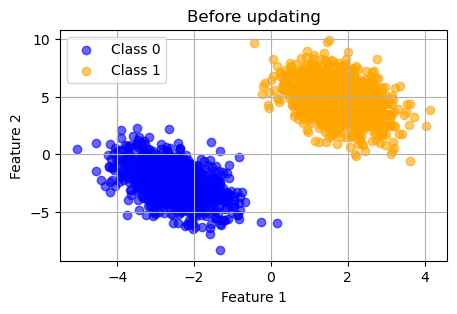

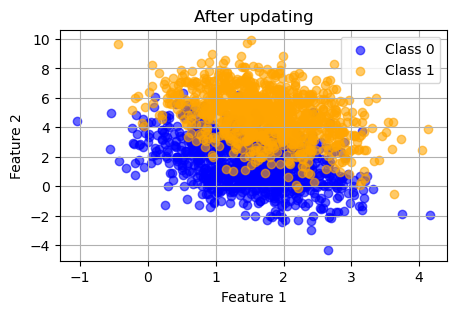

In [51]:
plt.figure(figsize=(5,3))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0', alpha=0.6)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='orange', label='Class 1', alpha=0.6)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Before updating')
plt.legend()
plt.grid(True)

plt.figure(figsize=(5,3))
plt.scatter(X_updated[y_updated == 0][:, 0],X_updated[y_updated == 0][:, 1], color='blue', label='Class 0', alpha=0.6)
plt.scatter(X_updated[y_updated == 1][:, 0], X_updated[y_updated == 1][:, 1], color='orange', label='Class 1', alpha=0.6)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('After updating')
plt.legend()
plt.grid(True)


plt.show()